# 02_feature_engineering.ipynb
Create session-level features and inspect them. Merge features onto train/test and save `train_final_with_features.csv` and `test_final_with_features.csv`.

In [8]:
import pandas as pd
import numpy as np
from pathlib import Path
import sys
import os

# Modify as needed — this should point to your project root
project_root = os.path.abspath("..")
sys.path.append(project_root)

from src.feature_engineering import create_session_features, add_session_features_to_dataset, save_session_features
pd.set_option('display.max_columns', 200)

### Load processed files

In [ ]:
raw = pd.read_csv("../data/processed/e-shop_clothing_2008_cleaned.csv")
train = pd.read_csv("../data/processed/train_with_targets.csv")
test = pd.read_csv("../data/processed/test_with_targets.csv")
print(raw.shape, train.shape, test.shape)

(165474, 14) (132379, 14) (33095, 14)


### Create session features

In [10]:
session_feats = create_session_features(raw)
display(session_feats.head(10))
session_feats.describe().T

INFO:src.feature_engineering:Created session features for 24026 sessions


,session_id,session_length,n_unique_models,n_unique_categories,category_entropy,mean_price,max_price,min_price,std_price,last_price,last_price_2,num_high_price_views,pct_price2_views,first_page,last_page,first_category,last_category,first_eq_last_category,models_per_click,last_order
0,1,9,9,4,1.974938e+00,42.111111,57.0,28.0,9.723333,48.0,1,5,0.555556,1,5,NaN,NaN,0,1.0,9
1,2,10,8,3,1.485475e+00,50.000000,67.0,38.0,9.848858,43.0,1,8,0.800000,2,2,NaN,NaN,0,0.8,10
2,3,6,6,3,1.251629e+00,42.166667,48.0,28.0,7.312470,43.0,1,4,0.666667,1,5,NaN,NaN,0,1.0,6
3,4,4,4,2,1.000000e+00,45.250000,62.0,33.0,11.076439,33.0,2,2,0.500000,2,2,NaN,NaN,0,1.0,4
4,5,1,1,1,-1.442823e-12,57.000000,57.0,57.0,0.000000,57.0,1,1,1.000000,2,2,NaN,NaN,0,1.0,1
5,6,5,5,2,9.709506e-01,42.800000,57.0,33.0,8.611620,57.0,1,2,0.400000,1,2,NaN,NaN,0,1.0,5
6,7,11,11,4,1.277613e+00,37.818182,62.0,28.0,10.751898,52.0,1,4,0.363636,1,1,NaN,NaN,0,1.0,11
7,8,9,9,2,7.642045e-01,37.888889,57.0,20.0,12.151309,57.0,1,4,0.444444,3,2,NaN,NaN,0,1.0,9
8,9,3,3,2,9.182958e-01,41.000000,57.0,28.0,12.027746,57.0,1,1,0.333333,1,2,NaN,NaN,0,1.0,3
9,10,5,5,2,7.219281e-01,45.400000,57.0,28.0,10.762899,38.0,2,3,0.600000,1,1,NaN,NaN,0,1.0,5


,count,mean,std,min,25%,50%,75%,max
session_id,24026.0,12013.500000,6935.853120,1.000000e+00,6.007250e+03,12013.500000,18019.750000,24026.0
session_length,24026.0,6.887289,8.995161,1.000000e+00,2.000000e+00,4.000000,8.000000,195.0
n_unique_models,24026.0,6.174353,7.525282,1.000000e+00,2.000000e+00,4.000000,8.000000,168.0
n_unique_categories,24026.0,1.851661,0.956479,1.000000e+00,1.000000e+00,2.000000,3.000000,4.0
category_entropy,24026.0,0.612473,0.636692,-1.442823e-12,-1.442823e-12,0.650022,1.000000,2.0
mean_price,24026.0,44.374906,8.454850,1.800000e+01,3.816667e+01,43.666667,49.000000,82.0
max_price,24026.0,55.921127,13.322385,1.800000e+01,4.800000e+01,57.000000,62.000000,82.0
min_price,24026.0,34.583493,10.809837,1.800000e+01,2.800000e+01,33.000000,38.000000,82.0
std_price,24026.0,7.482609,5.511954,0.000000e+00,0.000000e+00,8.588366,11.728215,31.0
last_price,24026.0,43.972696,12.322017,1.800000e+01,3.300000e+01,43.000000,52.000000,82.0


### Visual checks

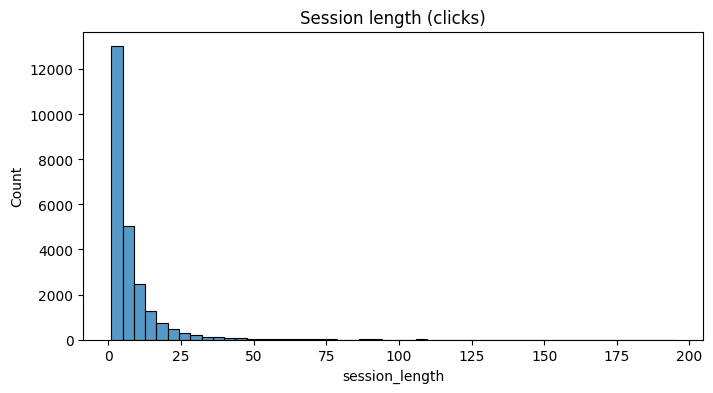

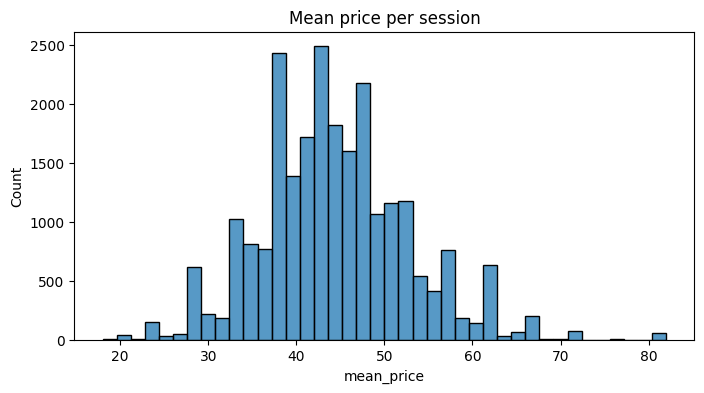

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
sns.histplot(session_feats['session_length'], bins=50)
plt.title('Session length (clicks)')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(session_feats['mean_price'].dropna(), bins=40)
plt.title('Mean price per session')
plt.show()

### Merge with train/test

In [12]:
train_aug = add_session_features_to_dataset(train, session_feats)
test_aug = add_session_features_to_dataset(test, session_feats)
print("train_aug:", train_aug.shape, "test_aug:", test_aug.shape)
display(train_aug.head(5))

train_aug: (132379, 33) test_aug: (33095, 33)


,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page,session_length,n_unique_models,n_unique_categories,category_entropy,mean_price,max_price,min_price,std_price,last_price,last_price_2,num_high_price_views,pct_price2_views,first_page,last_page,first_category,last_category,first_eq_last_category,models_per_click,last_order
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2,107,66,4,1.594070,47.000000,77.0,20.0,12.741132,48.0,1,62,0.579439,1,4,NaN,NaN,0,0.616822,107
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2,13,7,3,1.140116,53.076923,82.0,33.0,12.149464,57.0,1,9,0.692308,1,2,NaN,NaN,0,0.538462,13
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1,12,11,3,1.554585,38.750000,62.0,18.0,10.970605,33.0,2,5,0.416667,1,4,NaN,NaN,0,0.916667,12
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1,8,7,2,0.543564,51.250000,67.0,38.0,10.365206,57.0,1,5,0.625000,1,2,NaN,NaN,0,0.875000,8
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2,17,13,3,0.640206,51.470588,62.0,33.0,9.598515,57.0,1,12,0.705882,2,2,NaN,NaN,0,0.764706,17


### Save outputs

In [13]:
train_aug.to_csv("../data/processed/train_final_with_features.csv", index=False)
test_aug.to_csv("../data/processed/test_final_with_features.csv", index=False)
session_feats.to_csv("../data/processed/session_features.csv", index=False)
print("Saved train_final_with_features.csv, test_final_with_features.csv, session_features.csv")

Saved train_final_with_features.csv, test_final_with_features.csv, session_features.csv


### correlation table - numeric only

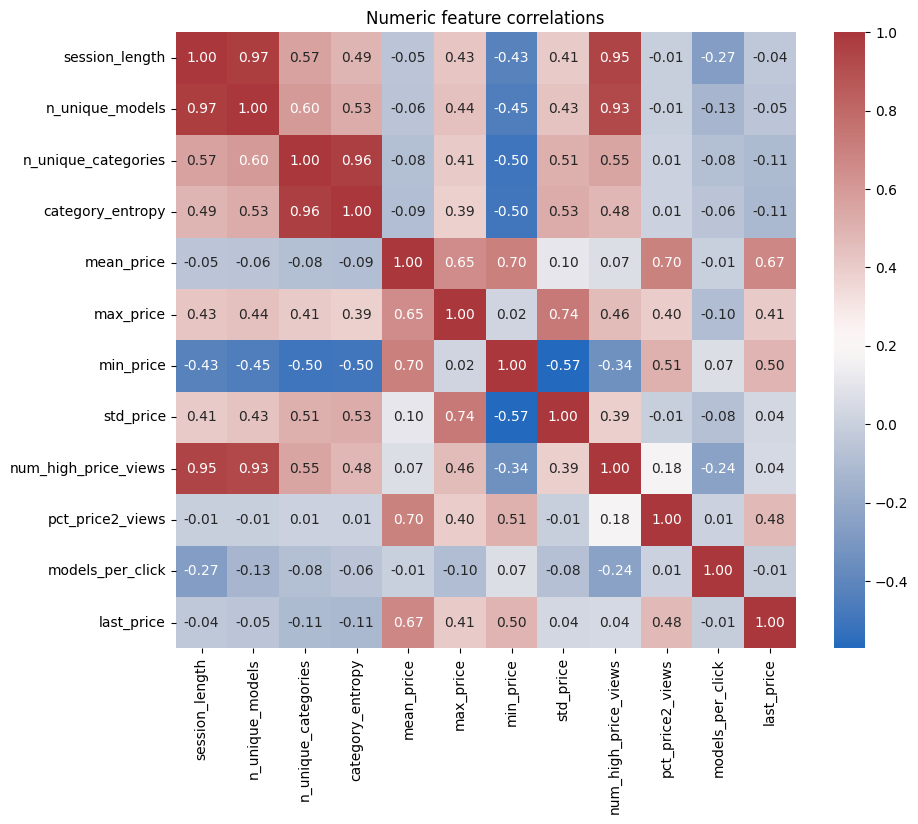

In [14]:
num_cols = ['session_length','n_unique_models','n_unique_categories','category_entropy','mean_price','max_price','min_price','std_price','num_high_price_views','pct_price2_views','models_per_click','last_price']
corr = session_feats[num_cols].corr()
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='vlag')
plt.title("Numeric feature correlations")
plt.show()